In [1]:
import pandas as pd
import numpy as np
import sys
import warnings
sys.path.append("../scripts")
from data_spliter import *

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/clean_abtest_data.csv')
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
1,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
2,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1
3,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
4,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1


In [3]:
# checking the list of unique values in platform 
platform_type = df['platform_os'].value_counts().index.tolist()
platform_type

[6, 5]

In [4]:
browser_type = df['browser'].value_counts().index.tolist()[:3]
browser_type

['Chrome Mobile', 'Chrome Mobile WebView', 'Facebook']

In [5]:
brow_df = data_split(df,'browser',browser_type)
plat_df = data_split(df,'platform_os',platform_type)

plat_5_data = plat_df[0].drop(['platform_os', 'no'],axis=1)
plat_6_data = plat_df[1].drop(['platform_os','no'],axis=1)

chrome_data = brow_df[0].drop(['browser','no'],axis=1)
chrome_webview_data = brow_df[1].drop(['browser','no'],axis=1)
facebook_data = brow_df[2].drop(['browser','no'],axis=1)

In [6]:
plat_5_data.to_csv('../data/platform_5.csv',index=False)
plat_6_data.to_csv('../data/platform_6.csv',index=False)
facebook_data.to_csv('../data/facebook_data.csv',index=False)
chrome_data.to_csv('../data/chrome_data.csv',index=False)
chrome_webview_data.to_csv('../data/chrome_webview_data.csv',index=False)

In [7]:
plat_5_data.head()

,auction_id,experiment,date,hour,device_make,browser,yes
0,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,Chrome Mobile WebView,0
1,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,Chrome Mobile,1
2,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,Chrome Mobile,0
3,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,Facebook,1
4,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,Chrome Mobile,0


In [8]:
plat_6_data.head()

,auction_id,experiment,date,hour,device_make,browser,yes
159,23b2028c-72ed-43b3-a2d7-d772b2d4d478,exposed,2020-07-03,8,iPhone,Mobile Safari,0
371,54a62f37-0c4d-4300-a063-1c6aa99244e5,control,2020-07-03,15,iPhone,Mobile Safari,0
372,54a68ad2-eed9-408e-9088-ddecfa64b0fd,control,2020-07-03,15,iPhone,Mobile Safari UI/WKWebView,0
467,688aaac1-535e-417a-a8d4-a529b033cbfa,control,2020-07-04,3,iPhone,Mobile Safari,1
558,7c003bed-32c3-4236-abf0-f571debe769b,exposed,2020-07-05,3,iPhone,Mobile Safari,1


In [9]:
facebook_data.head()

,auction_id,experiment,date,hour,device_make,platform_os,yes
3,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,1
10,023458f7-122d-475f-9525-1b9a3cc7a033,control,2020-07-03,15,MRD-LX1,6,0
11,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,1
19,03948b84-b5b1-4f26-81fc-e953218aef1a,control,2020-07-09,20,Samsung SM-G930F,6,1
25,04bb7622-8ac6-4cf8-bbab-31cd31698fe7,control,2020-07-03,15,Samsung SM-G973F,6,0


###############################################################

# Logistic Regression

### Using browser data and 5 Fold cross-validation
Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

In [10]:
import math
import matplotlib.pyplot as plt


from Ml_Process import ML_process as MLP
from models import ML_Models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

2022/09/03 20:50:38 INFO mlflow.tracking.fluent: Experiment with name 'different machine learning algorithms' does not exist. Creating a new experiment.


In [11]:
mlp = MLP()
mlm = ML_Models()

In [12]:
chrome_data =  pd.read_csv('../data/chrome_data.csv')
chrome_webview_data =  pd.read_csv('../data/chrome_webview_data.csv')
facebook_data =  pd.read_csv('../data/facebook_data.csv')
plat_5_data =  pd.read_csv('../data/platform_5.csv')
plat_6_data =  pd.read_csv('../data/platform_6.csv')


In [13]:
cat2, num2 = mlp.sep_cat_num(chrome_data)
cat3, num3 = mlp.sep_cat_num(chrome_webview_data)
cat4, num4 = mlp.sep_cat_num(facebook_data)
cat5, num5 = mlp.sep_cat_num(plat_5_data)
cat6, num6 = mlp.sep_cat_num(plat_6_data)

In [14]:
chrome_data[cat2].describe()

,auction_id,experiment,date,device_make
count,695,695,695,695
unique,695,2,8,14
top,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-03,Generic Smartphone
freq,1,371,176,665


In [15]:
# Using pipeline for the Machine learning

def pipeline_ml(cats):
    pipe_1 = Pipeline(
        steps=[
            ("label categories", FunctionTransformer(mlp.cat_labeler, kw_args={"cat_cols": cats})),
            ("scale data", FunctionTransformer(mlp.scaler)),
            ("separate target and features", FunctionTransformer(mlp.target_feature, kw_args={"f_r": [0, 6], "t":-1})),
            ("divide dataset", FunctionTransformer(mlp.set_splitter, kw_args={"test": 0.1, "val":0.2, "rand_state":8})),      
            ])
    return pipe_1




In [16]:
pipe_1 = pipeline_ml(cat2)
pipe_2 = pipeline_ml(cat5)

chrome_set = pipe_1.fit_transform(chrome_data)

catagories successfully labeled
Data successfully scaled
target and features separated
data successfully splitted


In [17]:
chrome_mobile_set = pipe_1.fit_transform(chrome_webview_data)

catagories successfully labeled
Data successfully scaled
target and features separated
data successfully splitted


In [18]:
facebook_set = pipe_1.fit_transform(facebook_data)

catagories successfully labeled
Data successfully scaled
target and features separated
data successfully splitted


In [19]:
platform_5_set = pipe_2.fit_transform(plat_5_data)

catagories successfully labeled
Data successfully scaled
target and features separated
data successfully splitted


In [20]:
platform_6_set = pipe_2.fit_transform(plat_6_data)

catagories successfully labeled
Data successfully scaled
target and features separated
data successfully splitted


In [21]:
model = LogisticRegression()
kfold_validation=KFold(5)

In [22]:
mlm.cross_val(chrome_data, model, globals(), kfold_validation, [0, 6], -1)

Result of chrome_data

[0.53956835 0.5323741  0.55395683 0.50359712 0.56834532]
0.539568345323741 

#################################




In [23]:
mlm.cross_val(chrome_webview_data, model, globals(), kfold_validation, [0, 6], -1)

Result of chrome_webview_data

[0.5        0.43478261 0.57777778 0.44444444 0.51111111]
0.4936231884057971 

#################################




In [24]:
mlm.cross_val(facebook_data, model, globals(), kfold_validation, [0, 6], -1)

Result of facebook_data

[0.5        0.58064516 0.41935484 0.41935484 0.5483871 ]
0.4935483870967742 

#################################




In [25]:
mlm.cross_val(plat_5_data, model, globals(), kfold_validation, [0, 6], -1)

Result of plat_5_data

[0.5203252  0.52653061 0.51836735 0.53469388 0.54693878]
0.529371163099386 

#################################




In [26]:
mlm.cross_val(plat_6_data, model, globals(), kfold_validation, [0, 6], -1)

Result of plat_6_data

[0.75       0.75       0.66666667 1.         0.33333333]
0.7 

#################################




* After performing Kfold_validation, it can be seen that the max accuracy of logistic regression with 5 fold is 0.75.
* This can mean the data is not enough or the model is not best suited since the accuracy is less than 0.8, i.e 80%

In [47]:
model = mlm.regression_model(chrome_set[0], chrome_set[1]) # for chrome 
model2 = mlm.regression_model(chrome_mobile_set[0], chrome_mobile_set[1]) 
model3 = mlm.regression_model(facebook_set[0], facebook_set[1]) 
model4 = mlm.regression_model(platform_5_set[0], platform_5_set[1]) 
model5 = mlm.regression_model(platform_6_set[0], platform_6_set[1]) 

The model accuracy is:  0.6142857142857143


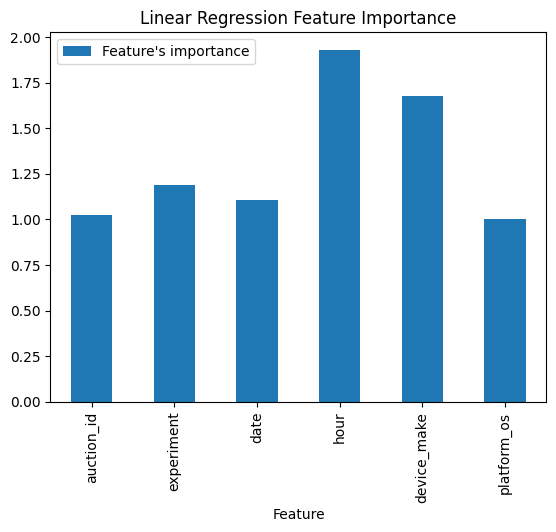

In [48]:
mlm.evaluate_model(model, chrome_data, chrome_set[2], chrome_set[3], "Linear Regression", globals())

The model accuracy is:  0.5652173913043478


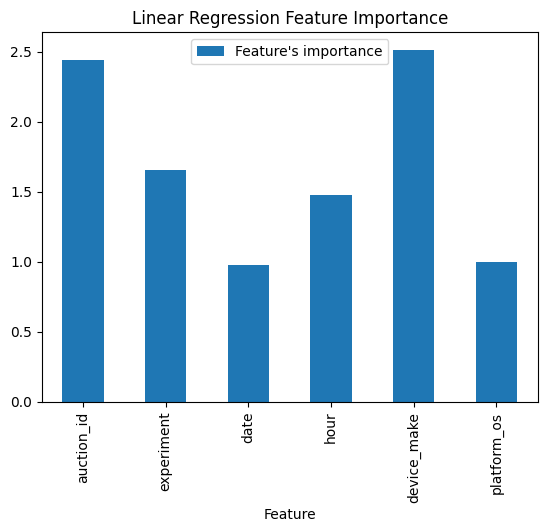

In [49]:
mlm.evaluate_model(model2, chrome_webview_data, chrome_mobile_set[2], chrome_mobile_set[3], "Linear Regression", globals())

The model accuracy is:  0.6875


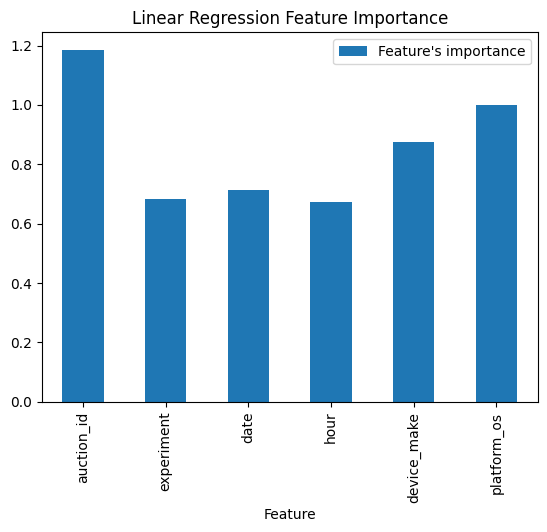

In [50]:
mlm.evaluate_model(model3, facebook_data, facebook_set[2], facebook_set[3], "Linear Regression", globals())

The model accuracy is:  0.5609756097560976


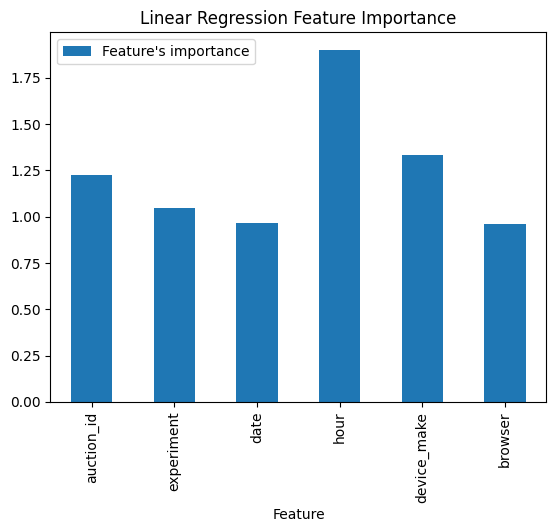

In [51]:
mlm.evaluate_model(model4, plat_5_data, platform_5_set[2], platform_5_set[3], "Linear Regression", globals())

The model accuracy is:  1.0


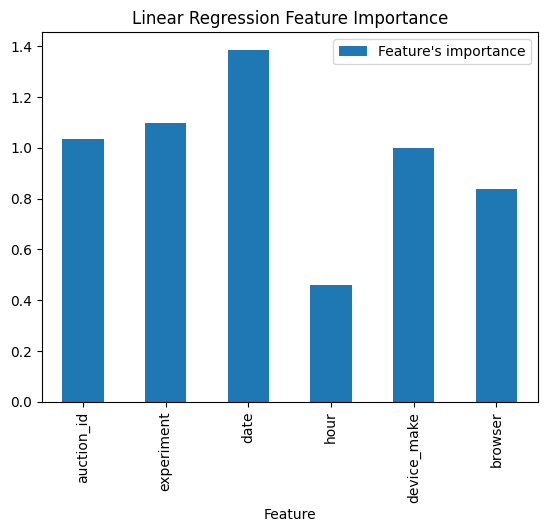

In [52]:
mlm.evaluate_model(model5, plat_6_data, platform_6_set[2], platform_6_set[3], "Linear Regression", globals())

In [53]:
# regression model intercept
model.intercept_

array([-0.68878456])

In [54]:
# Creating a features dataframe to see the importance

features_browser = ['auction_id','experiment','date','hour','device_make','platform_os']
features_platform = ['auction_id','experiment','date','hour','device_make','browser']
feature_importance_chrome_df = pd.DataFrame(features_browser,columns=['Feature'])

# Creating a new column for the feature importance
feature_importance_chrome_df['Feature\'s importance'] = pow(math.e,np.array(model.coef_[0]))
feature_importance_chrome_df.head(6)


,Feature,Feature's importance
0,auction_id,1.024659
1,experiment,1.188303
2,date,1.103739
3,hour,1.929474
4,device_make,1.673883
5,platform_os,1.000000


In [55]:
feature_importance_chrome_df['Feature\'s importance'] = pow(math.e,np.array(model2.coef_[0]))
feature_importance_chrome_df.head(6)

,Feature,Feature's importance
0,auction_id,2.440862
1,experiment,1.656604
2,date,0.975934
3,hour,1.480304
4,device_make,2.513241
5,platform_os,1.000000


In [56]:
feature_importance_chrome_df['Feature\'s importance'] = pow(math.e,np.array(model3.coef_[0]))
feature_importance_chrome_df.head(10)

,Feature,Feature's importance
0,auction_id,1.185379
1,experiment,0.684069
2,date,0.711869
3,hour,0.673289
4,device_make,0.875656
5,platform_os,1.000000


In [57]:
feature_importance_chrome_df['Feature\'s importance'] = pow(math.e,np.array(model4.coef_[0]))
feature_importance_chrome_df.head()

,Feature,Feature's importance
0,auction_id,1.226702
1,experiment,1.048663
2,date,0.964771
3,hour,1.900933
4,device_make,1.332270


In [58]:
feature_importance_chrome_df['Feature\'s importance'] = pow(math.e,np.array(model5.coef_[0]))
feature_importance_chrome_df.head()

,Feature,Feature's importance
0,auction_id,1.034687
1,experiment,1.099414
2,date,1.385556
3,hour,0.458619
4,device_make,1.000000
